<a href="https://colab.research.google.com/github/Yosolita1978/AiWorkshop/blob/main/GenerativeAI_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI workshop



#### Instructions

- Anything that has a `!` symbol is sending the code to the console
- Anything else is Python 3
- All your photos should be 512 x 512 pixels

In [1]:
!pip install --src /content/ git+https://github.com/huggingface/diffusers
!git clone https://github.com/huggingface/diffusers
!pip install -U -r diffusers/examples/dreambooth/requirements.txt

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-z4111sww
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-z4111sww
  Resolved https://github.com/huggingface/diffusers to commit e6ff75284025323f199313d9e076796c6ff8dd8a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.27.0.dev0-py3-none-any.whl size=1983542 sha256=180f178db8b84af45a93bf6ab588c96a09aa691e3a9ea63abe2f9470b7bd697a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9afpo0cp/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
Cloning into 'diffusers'...
remote: Enumerating objects: 56967, done.
remote: Counting objects: 100% (1147/1147), done.
remote: Compressing objects: 100% (607/607), done.
remote: Total 56967 (delta 704), reused 750 (delta 432), pack-reus

In [2]:
from accelerate.utils import write_basic_config
write_basic_config()

PosixPath('/root/.cache/huggingface/accelerate/default_config.yaml')

In [3]:
!pip install bitsandbytes ftfy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 16.3 MB/s eta 0:00:00


In [4]:
!accelerate launch diffusers/examples/dreambooth/train_dreambooth.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5"  \
  --instance_data_dir="/content/ecrodriguez"\
  --output_dir="/content/output" \
  --class_data_dir="/content/prior" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="a photo of ecrodriguez" \
  --class_prompt="a photo of a woman" \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --gradient_accumulation_steps=1 \
  --learning_rate=2e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=1600 \
  --num_class_images=100

2024-03-09 03:45:46.229186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-09 03:45:46.229257: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-09 03:45:46.230909: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-09 03:45:47.372966: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
03/09/2024 03:45:48 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: no

model_index.json: 100% 541/541 [00:00<00:00, 1.70MB/s]
Fetching 13 files:   

In [5]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("/content/output", torch_dtype=torch.float16)
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.27.0.dev0",
  "_name_or_path": "/content/output",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/80 [00:00<?, ?it/s]

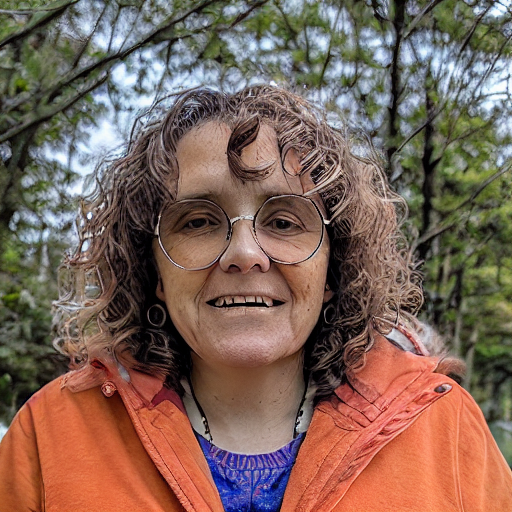

In [13]:
prompt = "A ecrodriguez photo as a 100 year old lady"
image = pipe(
    prompt,
    num_inference_steps=80,
    guidance_scale=7,
    manual_seed=1234
).images[0]
image

In [ ]:
import huggingface_hub
huggingface_hub.notebook_login()


In [ ]:
pipe.push_to_hub("ecrodriguez-workshop")